In [2]:
import tensorflow as tf
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
(xtrain, ytrain),(xtest,ytest) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


8


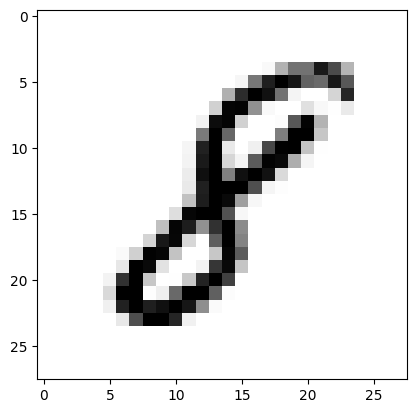

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
image_index = 7777
print(ytrain[image_index])
plt.imshow(xtrain[image_index],cmap= 'Greys')

In [4]:
xtrain.shape

(60000, 28, 28)

In [5]:
xtrain = xtrain.reshape(xtrain.shape[0], 28, 28, 1)
xtest = xtest.reshape(xtest.shape[0], 28,28,1)
input_shape = (28,28,1)

xtrain = xtrain.astype('float32')
xtest = xtest.astype('float32')

xtrain /= 255
xtest /= 255

print('x_train Shape:', xtrain.shape)
print('Number of images in x_train', xtrain.shape[0])
print('Number of images in x_test', xtest.shape[0])

x_train Shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [6]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D, Dropout, Flatten, MaxPooling2D

model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape = input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10, activation= tf.nn.softmax))

In [7]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x = xtrain, y = ytrain, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2077 - accuracy: 0.9379
Epoch 2/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0807 - accuracy: 0.9757
Epoch 3/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0561 - accuracy: 0.9826
Epoch 4/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0423 - accuracy: 0.9863
Epoch 5/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0348 - accuracy: 0.9884
Epoch 6/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0275 - accuracy: 0.9910
Epoch 7/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0242 - accuracy: 0.9916
Epoch 8/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0196 - accuracy: 0.9935
Epoch 9/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0194 - accuracy: 0.9936
Epoch 10/10
1875/1875 [==============================] - 23s 12m

In [8]:
model.evaluate(xtest, ytest)

313/313 [==============================] - 1s 4ms/step - loss: 0.0584 - accuracy: 0.9861


[0.05844942107796669, 0.9861000180244446]

1/1 [==============================] - 0s 136ms/step
9


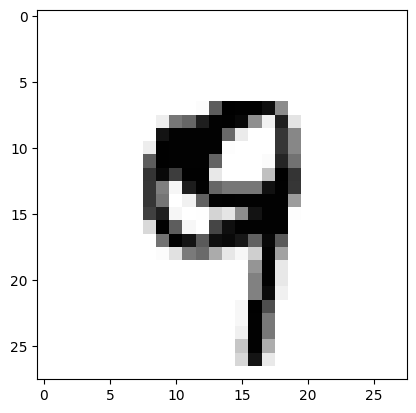

In [9]:
image_index = 4444
plt.imshow(xtest[image_index].reshape(28,28), cmap = 'Greys')
pred = model.predict(xtest[image_index].reshape(1,28,28,1))
print(pred.argmax())

1/1 [==============================] - 0s 27ms/step
1


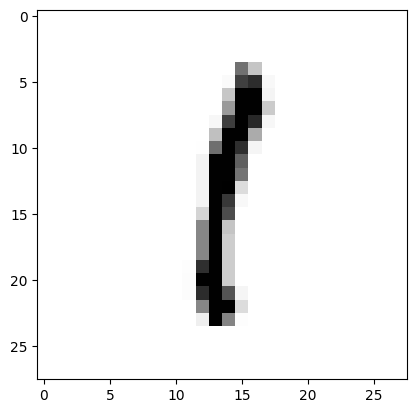

In [10]:
image_index = 3625
plt.imshow(xtest[image_index].reshape(28,28), cmap = 'Greys')
pred = model.predict(xtest[image_index].reshape(1,28,28,1))
print(pred.argmax())

### THANK YOU!